In [77]:
train_dir = 'C:\\Users\\Konrad\\Desktop\\facial-recognition-cnn\\deep-learning-face-recognition\\only_faces\\train'
test_dir = 'C:\\Users\\Konrad\\Desktop\\facial-recognition-cnn\\deep-learning-face-recognition\\only_faces\\test'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
# train_datagen = ImageDataGenerator(
#                                    rotation_range = 40,
#                                    shear_range = 0.2,
#                                    brightness_range = (0.2,1.5),
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

test_datagen = ImageDataGenerator()



train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=22,
        class_mode='categorical')


print("Test set: ")
# Generating the Testing Data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=21,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('Kształt danych wsadowych: ', data_batch.shape)
    print('Kształt danych wsadowych: ', labels_batch.shape)
    break

Found 108 images belonging to 16 classes.
Test set: 
Found 64 images belonging to 16 classes.
Kształt danych wsadowych:  (22, 64, 64, 1)
Kształt danych wsadowych:  (22, 16)


In [78]:

# class_indices have the numeric tag for each face
TrainClasses=train_generator.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future referenc
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'konrad', 1: 'subject01', 2: 'subject02', 3: 'subject03', 4: 'subject04', 5: 'subject05', 6: 'subject06', 7: 'subject07', 8: 'subject08', 9: 'subject09', 10: 'subject10', 11: 'subject11', 12: 'subject12', 13: 'subject13', 14: 'subject14', 15: 'subject15'}

 The Number of output neurons:  16


In [79]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2
 

model= Sequential()
model.add(Convolution2D(32, (4, 4), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(128, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(256, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(256, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

from tensorflow.keras import optimizers
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=["accuracy"])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=["accuracy"])


# Starting the model training
history = model.fit_generator(train_generator,
                    steps_per_epoch=5,
                    epochs=200,
                    validation_data=test_generator,
                    validation_steps=4)
 

Epoch 1/200


C:\Users\Konrad\AppData\Local\Temp\ipykernel_13940\711665175.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


5/5 [==============================] - 3s 353ms/step - loss: 8.7393 - accuracy: 0.0926 - val_loss: 0.2768 - val_accuracy: 0.0625
Epoch 2/200
5/5 [==============================] - 1s 242ms/step - loss: 0.7496 - accuracy: 0.0463 - val_loss: 0.4829 - val_accuracy: 0.0625
Epoch 3/200
5/5 [==============================] - 1s 276ms/step - loss: 0.3326 - accuracy: 0.0926 - val_loss: 0.5056 - val_accuracy: 0.0625
Epoch 4/200
5/5 [==============================] - 1s 249ms/step - loss: 0.3091 - accuracy: 0.0463 - val_loss: 0.5015 - val_accuracy: 0.1250
Epoch 5/200
5/5 [==============================] - 1s 244ms/step - loss: 0.2788 - accuracy: 0.0926 - val_loss: 0.4933 - val_accuracy: 0.1250
Epoch 6/200
5/5 [==============================] - 1s 228ms/step - loss: 0.2812 - accuracy: 0.0926 - val_loss: 0.4897 - val_accuracy: 0.1094
Epoch 7/200
5/5 [==============================] - 1s 233ms/step - loss: 0.2706 - accuracy: 0.0926 - val_loss: 0.4833 - val_accuracy: 0.2031
Epoch 8/200
5/5 [========

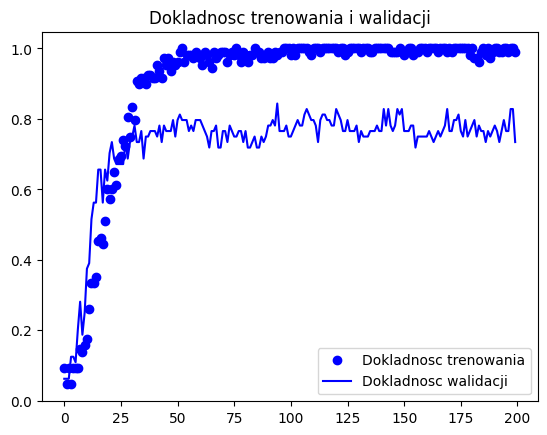

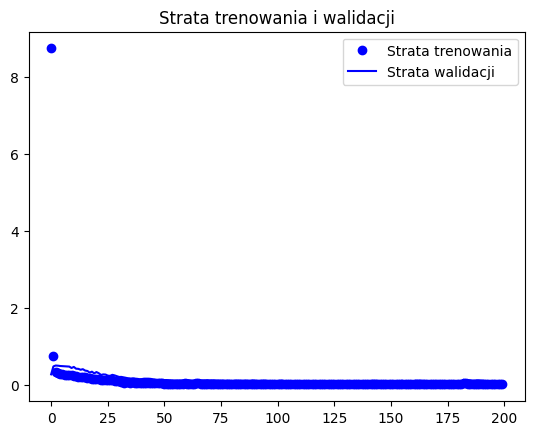

In [80]:
import matplotlib.pyplot as plt
# Accessing the metrics after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the results
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()
plt.show()

In [86]:
import numpy as np
from keras.preprocessing import image
 
ImagePath='C:\\Users\\Konrad\\Desktop\\facial-recognition-cnn\\deep-learning-face-recognition\\data\\test\\subject01\\konrad_4.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64), color_mode='grayscale')
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=model.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  subject09
